<a href="https://colab.research.google.com/github/vaibhavtiwari/OpenCV/blob/main/OpenCV_Advanced_Functionality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

# Color Spaces

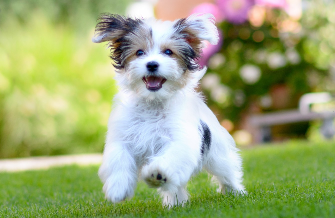

In [11]:
img = cv.resize(cv.imread('/content/dog2.jfif'),(cv.imread('/content/dog2.jfif').shape[1]//4,cv.imread('/content/dog2.jfif').shape[0]//4))
cv2_imshow(img)

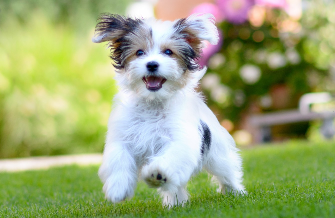

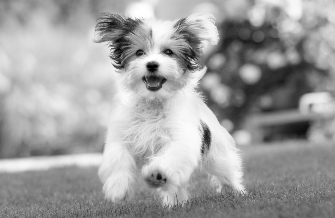

In [12]:
#BGR to Grayscale
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
cv2_imshow(img)
cv2_imshow(img_gray)

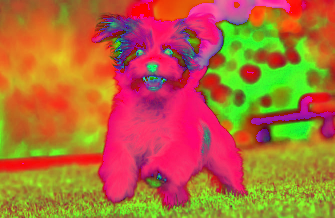

In [13]:
#BGR to HSV
img_hsv = cv.cvtColor(img,cv.COLOR_BGR2HSV)
cv2_imshow(img_hsv)

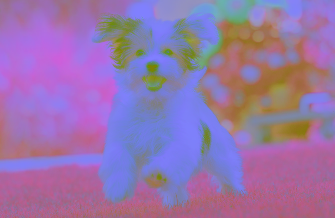

In [14]:
#BGR tp L*a*b
img_lab = cv.cvtColor(img,cv.COLOR_BGR2LAB)
cv2_imshow(img_lab)

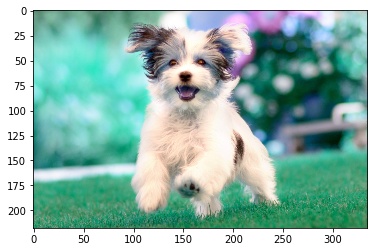

In [16]:
plt.imshow(img) #sows image in RGB

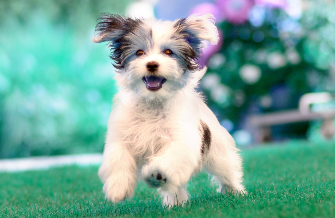

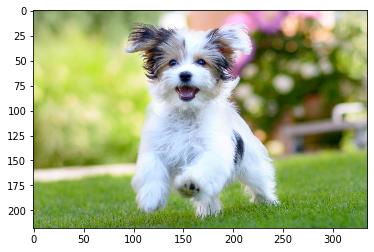

In [18]:
#BGR to RGB
img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB)
cv2_imshow(img_rgb)

plt.imshow(img_rgb)
plt.show()

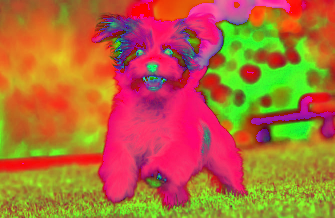

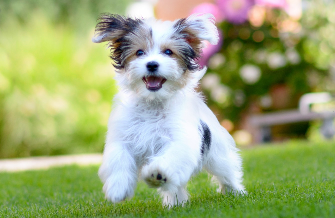

In [20]:
#HSV to BGR

img_hsv_bgr = cv.cvtColor(img_hsv,cv.COLOR_HSV2BGR)
cv2_imshow(img_hsv)
cv2_imshow(img_hsv_bgr)

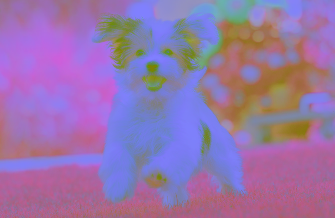

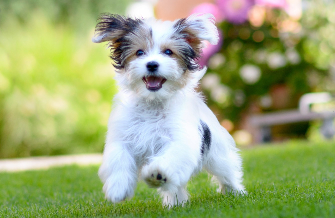

In [21]:
#LAB to BGR

img_lab_bgr = cv.cvtColor(img_lab,cv.COLOR_LAB2BGR)
cv2_imshow(img_lab)
cv2_imshow(img_lab_bgr)

# Color Channels

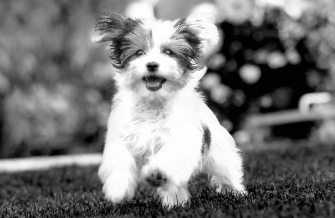

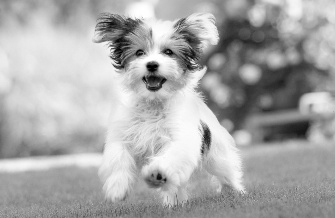

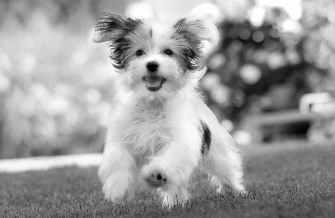

(218, 335, 3)
(218, 335)
(218, 335)
(218, 335)


In [25]:
b,g,r = cv.split(img)
cv2_imshow(b)
cv2_imshow(g)
cv2_imshow(r)
print(img.shape)
print(b.shape)
print(g.shape)
print(r.shape)

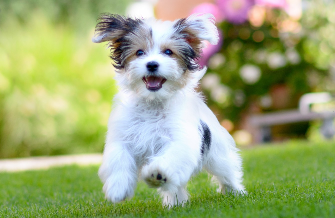

In [26]:
img_merged = cv.merge([b,g,r])
cv2_imshow(img_merged)

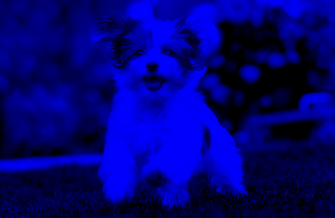

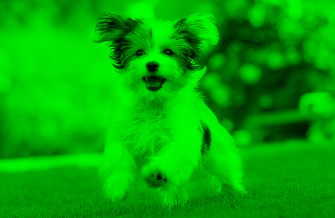

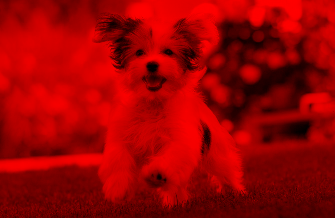

In [29]:
blank = np.zeros(img.shape[:2],dtype='uint8')
img_blue = cv.merge([b,blank,blank])
img_red = cv.merge([blank,g,blank])
img_green = cv.merge([blank,blank,r])

cv2_imshow(img_blue)
cv2_imshow(img_red)
cv2_imshow(img_green)

# Blurring Techniques

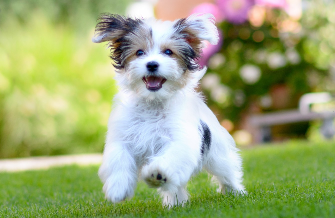

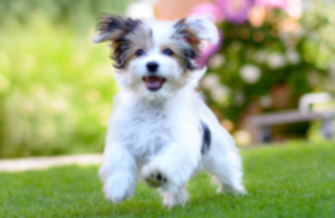

In [37]:
#Averaging
img_average = cv.blur(img,(3,3))
cv2_imshow(img)
cv2_imshow(img_average)

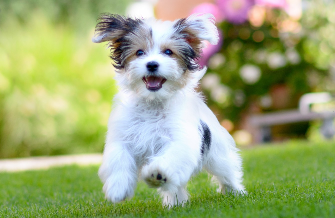

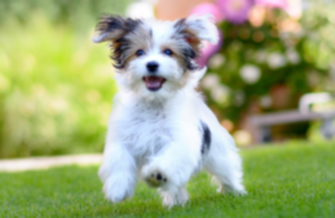

In [38]:
#Gaussian Blur
img_gaussian = cv.GaussianBlur(img,(3,3),1)
cv2_imshow(img)
cv2_imshow(img_gaussian)

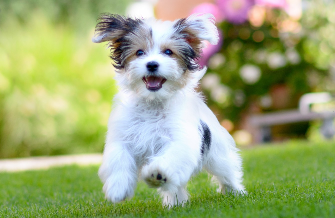

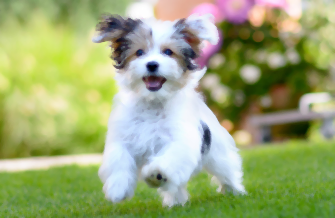

In [39]:
#Median Blur
img_median = cv.medianBlur(img,3)
cv2_imshow(img)
cv2_imshow(img_median)

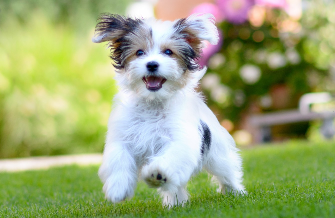

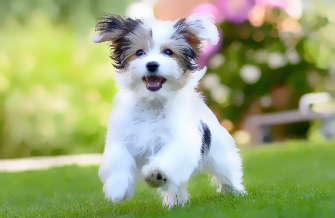

In [42]:
#Bilateral Blurring
img_bilateral = cv.bilateralFilter(img,10,35,25)
cv2_imshow(img)
cv2_imshow(img_bilateral)

# Bitwise Operation

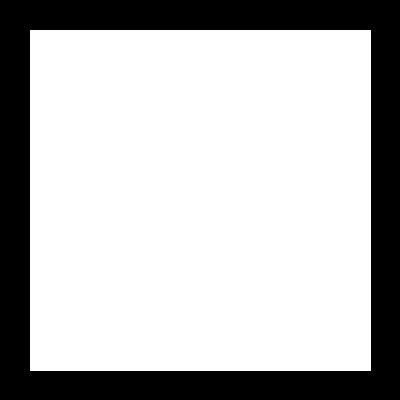

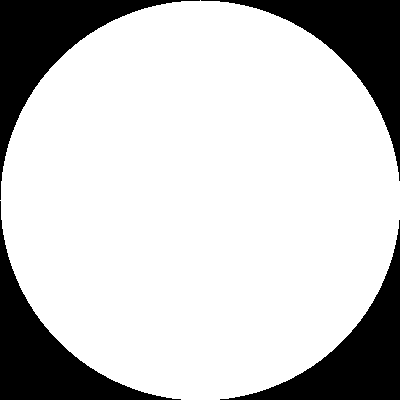

In [4]:
blank = np.zeros((400,400),dtype='uint8')

rectangle = cv.rectangle(blank.copy(),(30,30),(370,370),255,-1)
circle = cv.circle(blank.copy(),(200,200),200,255,-1)

cv2_imshow(rectangle)
cv2_imshow(circle)


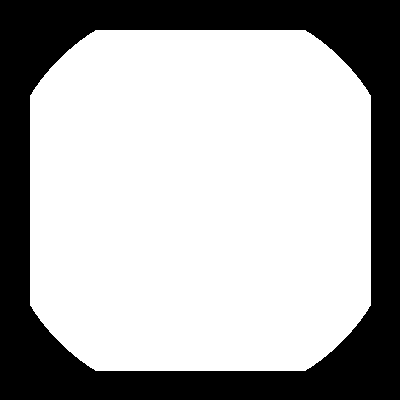

In [6]:
#bitwise AND --> intersecting regions
bitwise_and = cv.bitwise_and(rectangle,circle)
cv2_imshow(bitwise_and)

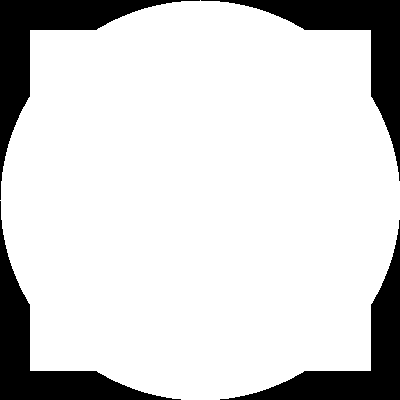

In [7]:
#biwise OR --> non intersecting and intersecting regions
bitwise_or = cv.bitwise_or(rectangle,circle)
cv2_imshow(bitwise_or)

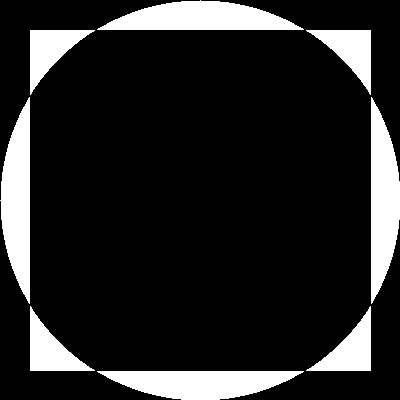

In [8]:
#bitwise XOR -->non-intersecting regions
bitwise_xor = cv.bitwise_xor(rectangle,circle)
cv2_imshow(bitwise_xor)

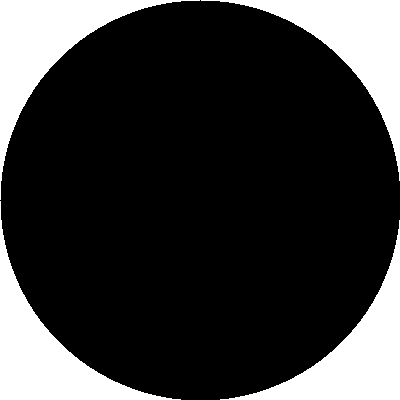

In [10]:
#bitwise NOT
bitwise_not = cv.bitwise_not(circle)
cv2_imshow(bitwise_not)

# Masking

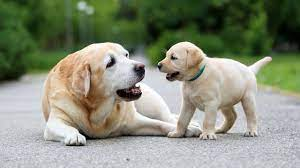

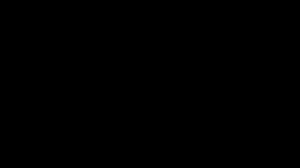

In [34]:
img = cv.imread('/content/dog3.jfif')
cv2_imshow(img)
blank = np.zeros(img.shape[:2],dtype='uint8')
cv2_imshow(blank)

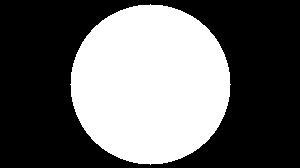

In [35]:
mask = cv.circle(blank,(img.shape[1]//2,img.shape[0]//2),80,255,-1)
cv2_imshow(mask)

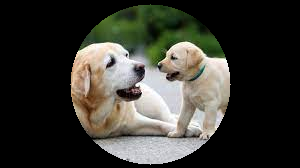

In [37]:
masked = cv.bitwise_and(img,img,mask=mask)
cv2_imshow(masked)

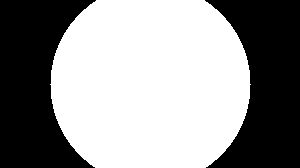

In [40]:
circle = cv.circle(blank.copy(),(img.shape[1]//2,img.shape[0]//2),100,255,-1)
cv2_imshow(circle)

# Histogram

In [17]:
img = cv.imread('/dog1.jpg')
print(img.shape)
# cv2_imshow(img)

(825, 800, 3)


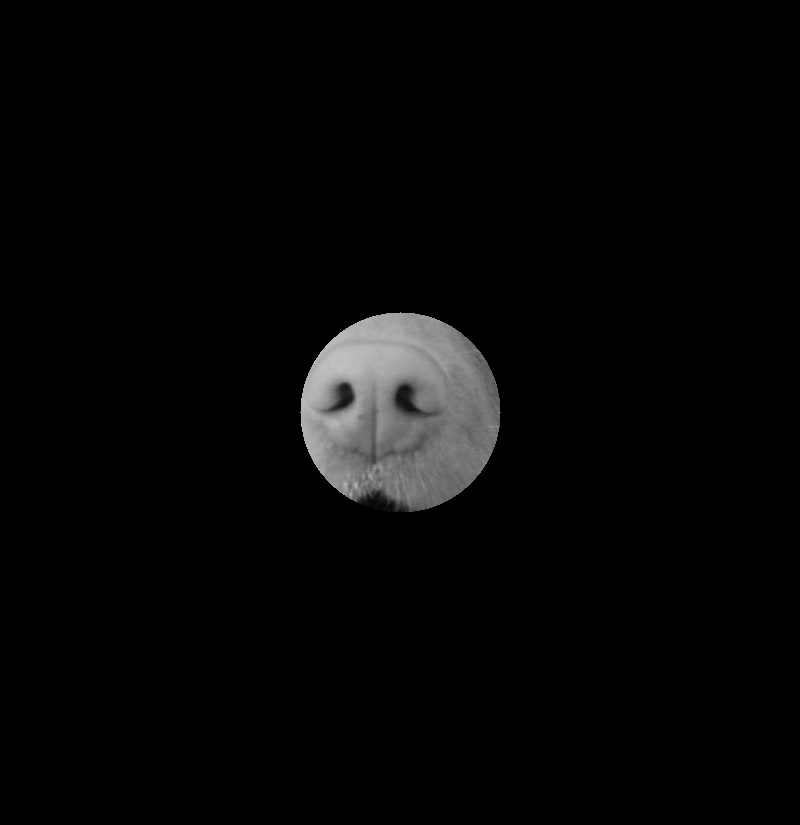

In [28]:
blank = np.zeros(img.shape[:2],dtype='uint8')
circle = cv.circle(blank,(img.shape[1]//2,img.shape[0]//2),100,255,-1)

img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
mask = cv.bitwise_and(img_gray,img_gray,mask=circle)
cv2_imshow(mask)
# cv2_imshow(img_gray)
# print(img_gray.shape)

In [29]:
#Grayscale Histogram
img_gray_hist = cv.calcHist([img_gray], [0],mask, [256],[0,256])

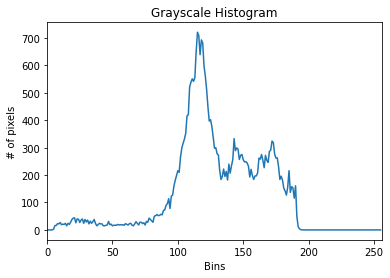

In [30]:
plt.figure()
plt.title('Grayscale Histogram')
plt.xlabel('Bins')
plt.ylabel('# of pixels')
plt.plot(img_gray_hist)
plt.xlim([0,256])
plt.show()

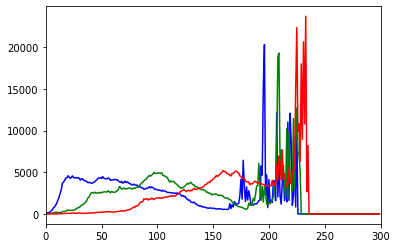

In [38]:
#Colour histogram

colors = ('b','g','r')
for i,col in enumerate(colors):
  hist1 = cv.calcHist([img],[i],None,[300],[0,300])
  hist2 = cv.calcHist([img],[i],mask,[300],[0,300])
  plt.plot(hist1,color=col)
  # plt.plot(hist2,color=col)
  plt.xlim([0,300])

plt.show()

# Thresholding

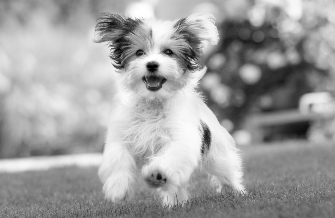

In [41]:
img = cv.imread('/content/dog2.jfif')
img = cv.resize(img,(img.shape[1]//4,img.shape[0]//4))

img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
cv2_imshow(img_gray)

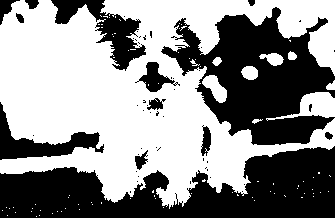

In [46]:
#Simple Thresholding
threshold, thresh = cv.threshold(img_gray,150, 255, cv.THRESH_BINARY)
cv2_imshow(thresh)

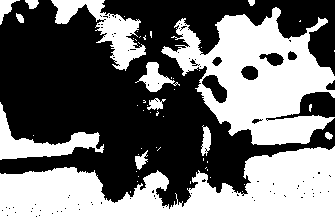

In [48]:
threshold, thresh_inv = cv.threshold(img_gray,150, 255, cv.THRESH_BINARY_INV)
cv2_imshow(thresh_inv)

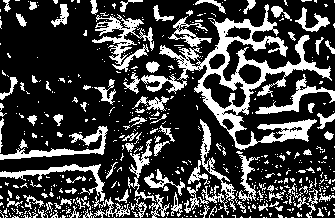

In [57]:
#Adaptive Thresholding

adaptive_thresh = cv.adaptiveThreshold(img_gray,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY_INV, 11, 5)
cv2_imshow(adaptive_thresh)

# Edge Detection

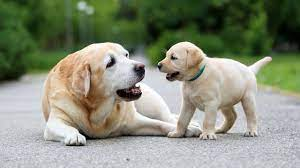

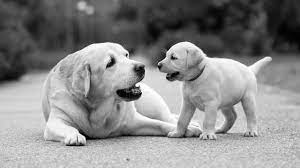

In [65]:
img = cv.imread('/content/dog3.jfif')
# img = cv.resize(img, (img.shape[1]//4,img.shape[0]//4))
cv2_imshow(img)
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv2_imshow(img_gray)

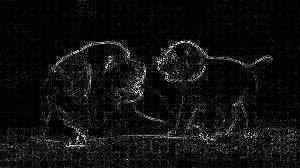

In [66]:
# Laplacian 
lap = cv.Laplacian(img_gray, cv.CV_64F)
lap = np.uint8(np.absolute(lap))
cv2_imshow(lap)

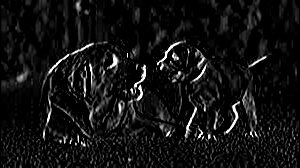

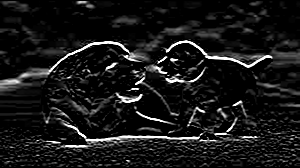

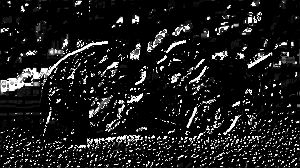

In [68]:
#Sobel
sobelx = cv.Sobel(img_gray,cv.CV_64F,1,0) #gradient calculated along the x axis
sobely = cv.Sobel(img_gray,cv.CV_64F,0,1) #gradient calculated along the y axis
combined_sobel = cv.bitwise_or(sobelx,sobely)
cv2_imshow(sobelx)
cv2_imshow(sobely)
cv2_imshow(combined_sobel)

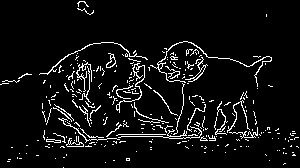

In [69]:
img_canny = cv.Canny(img_gray,150,175)
cv2_imshow(img_canny)